**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**July, 2023**

---

# Notebook to perform assing and explore the cell type predictions product of the logistic regression from the MFI reference


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata
import scvi


In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/integrated/annotation/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
absl                NA
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiw

'/opt/conda/bin/python'

In [3]:
#Function to add the souporcell id

def add_souporcell_id(adata_obj, cell_id, souporcell_clusters):
    '''
    Function to add the souporcell status (e.g. 0,1, not pooled, etc.) to the cells
    
    Input
        adata_obj: adata object
        cell_id: id of a cell
    
    '''
    
    curr_sample = adata_obj.obs.loc[cell_id, 'sample']
    
    #print('sample',sample, 'barcode', cell_id)
    
    if curr_sample in samples:
        #extracts the table contained in the indicated key of the dictionary
        curr_souporcell_table = souporcell_clusters[curr_sample]
        
        if (cell_id in list(curr_souporcell_table.index)): #checking that the cells are into the data
            curr_assign = souporcell_clusters[curr_sample].loc[cell_id,'assignment']
            #print('returning',curr_assign)
            return(curr_assign)

        else:
            # cell barcode is filtered by souporcell
            return('filtered_by_souporcell')
    else:
        return('not_pooled')

## Loading data

In [4]:
adata= sc.read('../results/scVI/rna3_scVIintegrated_All_latent30.h5ad')

In [7]:
adata

View of AnnData object with n_obs × n_vars = 190897 × 36601
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'sample_barcode', 'assignment_SoC', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi'
    var: 'gene_ids', 'feature_types', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi', 'donor_id_colors', 'hpi_colors', 'hvg', 'infection_colors', 'leiden', 'neighbors', 'sample_colors', 'umap'
    obsm: 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_scVI_n_latent_40', 'X_umap', '_scvi_extra_categoricals'
    layers: 'raw

# Loading log regression- label transfering predictions

In [8]:
#
prediction= pd.read_csv('../results/log_regression/logreg_MFIref_InfectedExplants_HVGs_20230707.csv', index_col=0)

In [9]:
prediction

celltype_predictions  probabilities
Pla_HDBR13007974_AAACCCAAGAAGAGCA                 dNK2       0.595753
Pla_HDBR13007974_AAACCCAAGCGTTGTT                  dS2       0.770922
Pla_HDBR13007974_AAACCCAAGTAGTCAA           VCT_fusing       0.997813
Pla_HDBR13007974_AAACCCACAATGAACA                 HOFB       0.736065
Pla_HDBR13007974_AAACCCACAGAGAGGG                 HOFB       0.739323
...                                                ...            ...
Pla_HDBR13661572_TTTGTTGCATGTCTAG                  fF2       0.914350
Pla_HDBR13661572_TTTGTTGGTAGGCAAC                 iEVT       0.270191
Pla_HDBR13661572_TTTGTTGGTGCTTATG               Endo_F       0.986252
Pla_HDBR13661572_TTTGTTGGTGGTAACG                  dM1       0.653951
Pla_HDBR13661572_TTTGTTGGTTGTATGC                  fF2       0.999999

[217256 rows x 2 columns]

In [10]:
adata.obs= adata.obs.join(prediction)

In [11]:
adata.obs.head()

sample   stage          donor  \
Pla_HDBR13007974_AAACCCAAGAAGAGCA  Pla_HDBR13007974  UI_24h  Hrv171_Hrv172   
Pla_HDBR13007974_AAACCCAAGCGTTGTT  Pla_HDBR13007974  UI_24h  Hrv171_Hrv172   
Pla_HDBR13007974_AAACCCAAGTAGTCAA  Pla_HDBR13007974  UI_24h  Hrv171_Hrv172   
Pla_HDBR13007974_AAACCCACAATGAACA  Pla_HDBR13007974  UI_24h  Hrv171_Hrv172   
Pla_HDBR13007974_AAACCCACAGAGAGGG  Pla_HDBR13007974  UI_24h  Hrv171_Hrv172   

                                   hpi infection  percent_mito  n_counts  \
Pla_HDBR13007974_AAACCCAAGAAGAGCA  24h        UI      0.001482    5397.0   
Pla_HDBR13007974_AAACCCAAGCGTTGTT  24h        UI      0.019590    6432.0   
Pla_HDBR13007974_AAACCCAAGTAGTCAA  24h        UI      0.045489   49221.0   
Pla_HDBR13007974_AAACCCACAATGAACA  24h        UI      0.045332    9243.0   
Pla_HDBR13007974_AAACCCACAGAGAGGG  24h        UI      0.031214    7753.0   

                                  batch                     sample_barcode  \
Pla_HDBR13007974_AAACCCAAGAAGAGCA     0  Pla_HDBR13007974_AAACCCAAGAAGAGCA   
Pla_HDBR13007974_AAACCCAAGCGTTGTT     0  Pla_HDBR13007974_AAACCCAAGCGTTGTT   
Pla_HDBR13007974_AAACCCAAGTAGTCAA     0  Pla_HDBR13007974_AAACCCAAGTAGTCAA   
Pla_HDBR13007974_AAACCCACAATGAACA     0  Pla_HDBR13007974_AAACCCACAATGAACA   
Pla_HDBR13007974_AAACCCACAGAGAGGG     0  Pla_HDBR13007974_AAACCCACAGAGAGGG   

                                  assignment_SoC  ... pct_counts_tg  \
Pla_HDBR13007974_AAACCCAAGAAGAGCA              0  ...           0.0   
Pla_HDBR13007974_AAACCCAAGCGTTGTT              1  ...           0.0   
Pla_HDBR13007974_AAACCCAAGTAGTCAA              0  ...           0.0   
Pla_HDBR13007974_AAACCCACAATGAACA              1  ...           0.0   
Pla_HDBR13007974_AAACCCACAGAGAGGG              1  ...           0.0   

                                   Tg_infected  n_genes  _scvi_batch  \
Pla_HDBR13007974_AAACCCAAGAAGAGCA        False      569            8   
Pla_HDBR13007974_AAACCCAAGCGTTGTT        False     1904            9   
Pla_HDBR13007974_AAACCCAAGTAGTCAA        False     5525            8   
Pla_HDBR13007974_AAACCCACAATGAACA        False     3032            9   
Pla_HDBR13007974_AAACCCACAGAGAGGG        False     2803            9   

                                   _scvi_labels  _scvi_local_l_mean  \
Pla_HDBR13007974_AAACCCAAGAAGAGCA             0            9.735959   
Pla_HDBR13007974_AAACCCAAGCGTTGTT             0            9.562532   
Pla_HDBR13007974_AAACCCAAGTAGTCAA             0            9.735959   
Pla_HDBR13007974_AAACCCACAATGAACA             0            9.562532   
Pla_HDBR13007974_AAACCCACAGAGAGGG             0            9.562532   

                                   _scvi_local_l_var leiden_scvi  \
Pla_HDBR13007974_AAACCCAAGAAGAGCA           0.726819          10   
Pla_HDBR13007974_AAACCCAAGCGTTGTT           0.683827           3   
Pla_HDBR13007974_AAACCCAAGTAGTCAA           0.726819           1   
Pla_HDBR13007974_AAACCCACAATGAACA           0.683827           0   
Pla_HDBR13007974_AAACCCACAGAGAGGG           0.683827           0   

                                   celltype_predictions  probabilities  
Pla_HDBR13007974_AAACCCAAGAAGAGCA                  dNK2       0.595753  
Pla_HDBR13007974_AAACCCAAGCGTTGTT                   dS2       0.770922  
Pla_HDBR13007974_AAACCCAAGTAGTCAA            VCT_fusing       0.997813  
Pla_HDBR13007974_AAACCCACAATGAACA                  HOFB       0.736065  
Pla_HDBR13007974_AAACCCACAGAGAGGG                  HOFB       0.739323  

[5 rows x 36 columns]

In [13]:
adata.obs.tail()

sample   stage   donor  hpi  \
Pla_HDBR13661572_TTTGTTGCATGTCTAG  Pla_HDBR13661572  Lm_24h  Hrv236  24h   
Pla_HDBR13661572_TTTGTTGGTAGGCAAC  Pla_HDBR13661572  Lm_24h  Hrv236  24h   
Pla_HDBR13661572_TTTGTTGGTGCTTATG  Pla_HDBR13661572  Lm_24h  Hrv236  24h   
Pla_HDBR13661572_TTTGTTGGTGGTAACG  Pla_HDBR13661572  Lm_24h  Hrv236  24h   
Pla_HDBR13661572_TTTGTTGGTTGTATGC  Pla_HDBR13661572  Lm_24h  Hrv236  24h   

                                  infection  percent_mito  n_counts batch  \
Pla_HDBR13661572_TTTGTTGCATGTCTAG        Lm      0.024774    2099.0     2   
Pla_HDBR13661572_TTTGTTGGTAGGCAAC        Lm      0.061145    6967.0     2   
Pla_HDBR13661572_TTTGTTGGTGCTTATG        Lm      0.037710   22938.0     2   
Pla_HDBR13661572_TTTGTTGGTGGTAACG        Lm      0.037474    5844.0     2   
Pla_HDBR13661572_TTTGTTGGTTGTATGC        Lm      0.119690    2966.0     2   

                                                      sample_barcode  \
Pla_HDBR13661572_TTTGTTGCATGTCTAG  Pla_HDBR13661572_TTTGTTGCATGTCTAG   
Pla_HDBR13661572_TTTGTTGGTAGGCAAC  Pla_HDBR13661572_TTTGTTGGTAGGCAAC   
Pla_HDBR13661572_TTTGTTGGTGCTTATG  Pla_HDBR13661572_TTTGTTGGTGCTTATG   
Pla_HDBR13661572_TTTGTTGGTGGTAACG  Pla_HDBR13661572_TTTGTTGGTGGTAACG   
Pla_HDBR13661572_TTTGTTGGTTGTATGC  Pla_HDBR13661572_TTTGTTGGTTGTATGC   

                                  assignment_SoC  ... pct_counts_tg  \
Pla_HDBR13661572_TTTGTTGCATGTCTAG     not_pooled  ...           NaN   
Pla_HDBR13661572_TTTGTTGGTAGGCAAC     not_pooled  ...           NaN   
Pla_HDBR13661572_TTTGTTGGTGCTTATG     not_pooled  ...           NaN   
Pla_HDBR13661572_TTTGTTGGTGGTAACG     not_pooled  ...           NaN   
Pla_HDBR13661572_TTTGTTGGTTGTATGC     not_pooled  ...           NaN   

                                   Tg_infected  n_genes  _scvi_batch  \
Pla_HDBR13661572_TTTGTTGCATGTCTAG          nan     1307            6   
Pla_HDBR13661572_TTTGTTGGTAGGCAAC          nan     3044            6   
Pla_HDBR13661572_TTTGTTGGTGCTTATG          nan     5864            6   
Pla_HDBR13661572_TTTGTTGGTGGTAACG          nan     2498            6   
Pla_HDBR13661572_TTTGTTGGTTGTATGC          nan     1586            6   

                                   _scvi_labels  _scvi_local_l_mean  \
Pla_HDBR13661572_TTTGTTGCATGTCTAG             0            9.104866   
Pla_HDBR13661572_TTTGTTGGTAGGCAAC             0            9.104866   
Pla_HDBR13661572_TTTGTTGGTGCTTATG             0            9.104866   
Pla_HDBR13661572_TTTGTTGGTGGTAACG             0            9.104866   
Pla_HDBR13661572_TTTGTTGGTTGTATGC             0            9.104866   

                                   _scvi_local_l_var leiden_scvi  \
Pla_HDBR13661572_TTTGTTGCATGTCTAG           1.062307           6   
Pla_HDBR13661572_TTTGTTGGTAGGCAAC           1.062307           6   
Pla_HDBR13661572_TTTGTTGGTGCTTATG           1.062307           4   
Pla_HDBR13661572_TTTGTTGGTGGTAACG           1.062307           8   
Pla_HDBR13661572_TTTGTTGGTTGTATGC           1.062307           6   

                                   celltype_predictions  probabilities  
Pla_HDBR13661572_TTTGTTGCATGTCTAG                   fF2       0.914350  
Pla_HDBR13661572_TTTGTTGGTAGGCAAC                  iEVT       0.270191  
Pla_HDBR13661572_TTTGTTGGTGCTTATG                Endo_F       0.986252  
Pla_HDBR13661572_TTTGTTGGTGGTAACG                   dM1       0.653951  
Pla_HDBR13661572_TTTGTTGGTTGTATGC                   fF2       0.999999  

[5 rows x 36 columns]

In [14]:
#removing donor column which only contains Tg samples donors, this to avoid future confusions
adata.obs= adata.obs.drop(columns='donor')

#Creating new column to plot the scrublet doublets
adata.obs['scrublet_doublet']=adata.obs.is_doublet.astype('string')

# Loading previous individual annotation

In [15]:
#
individualAnnotation= pd.read_csv('../data/rna8_scVIintegrated_20230707_Annotation.csv', index_col=0)
individualAnnotation

cell_type
Pla_HDBR13007974_AAACCCAAGCGTTGTT           F
Pla_HDBR13007974_AAACCCAAGTAGTCAA  VCT_fusing
Pla_HDBR13007974_AAACCCACAATGAACA         HBC
Pla_HDBR13007974_AAACCCACAGAGAGGG         HBC
Pla_HDBR13007974_AAACCCACAGTAGAAT         HBC
...                                       ...
Pla_HDBR13661572_TTTGTTGAGGTTCATC         HBC
Pla_HDBR13661572_TTTGTTGCAAATTAGG      Endo_f
Pla_HDBR13661572_TTTGTTGCAATAGGGC           F
Pla_HDBR13661572_TTTGTTGGTGCTTATG      Endo_f
Pla_HDBR13661572_TTTGTTGGTGGTAACG       PAMM1

[113469 rows x 1 columns]

In [16]:
individualAnnotation.head()

cell_type
Pla_HDBR13007974_AAACCCAAGCGTTGTT           F
Pla_HDBR13007974_AAACCCAAGTAGTCAA  VCT_fusing
Pla_HDBR13007974_AAACCCACAATGAACA         HBC
Pla_HDBR13007974_AAACCCACAGAGAGGG         HBC
Pla_HDBR13007974_AAACCCACAGTAGAAT         HBC

In [17]:
adata.obs= adata.obs.join(individualAnnotation)
adata.obs= adata.obs.rename(columns={"cell_type":'cell_type_2022'})

... storing 'celltype_predictions' as categorical
... storing 'scrublet_doublet' as categorical
... storing 'cell_type_2022' as categorical


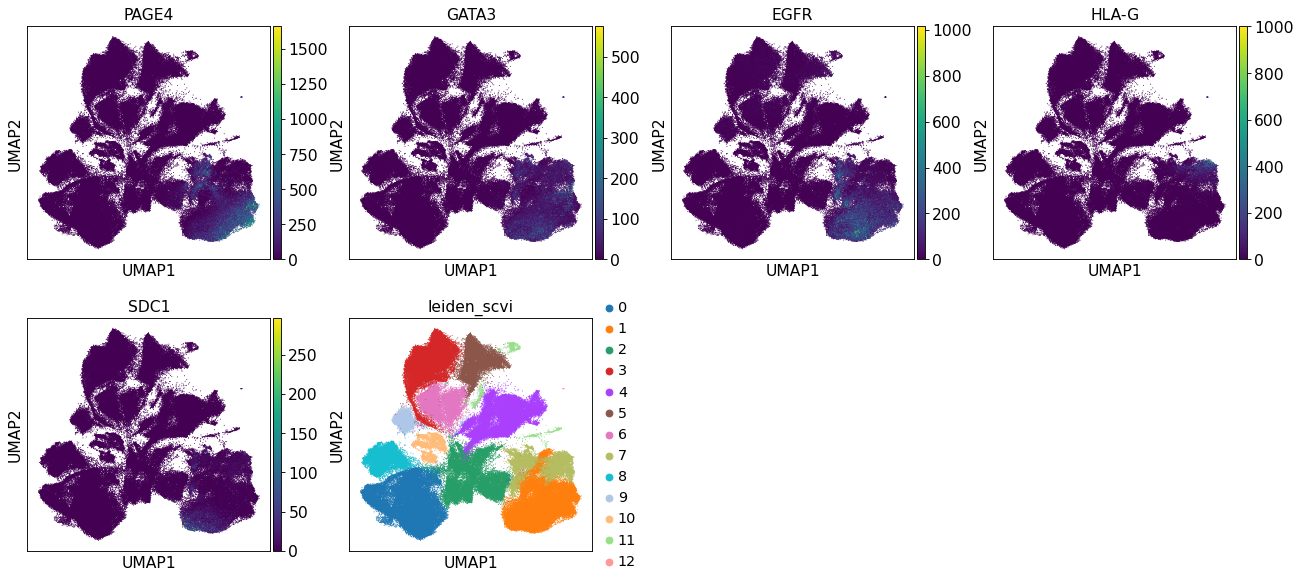

In [18]:
sc.pl.umap(adata, color=['PAGE4', 'GATA3', 'EGFR', 'HLA-G','SDC1','leiden_scvi']
           ,use_raw=False, size=3)

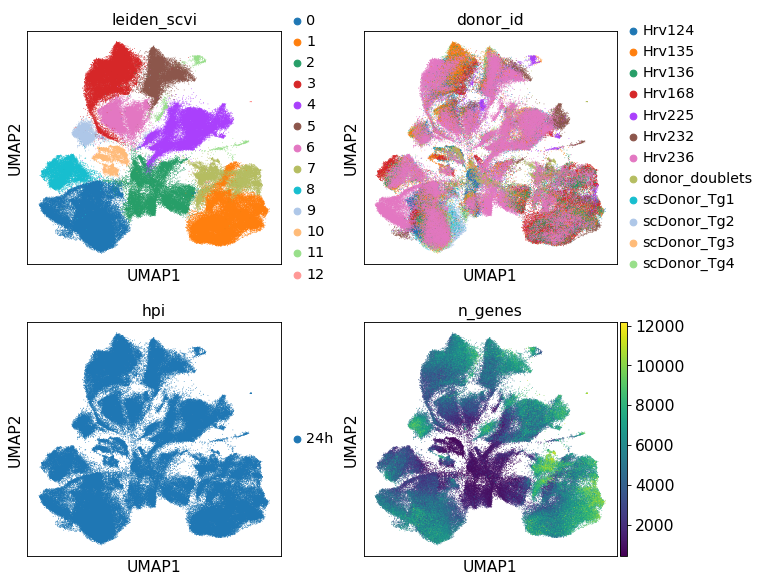

In [19]:
sc.pl.umap(adata, color=["leiden_scvi",'donor_id', 
                         'hpi','n_genes' ], ncols=2, size=2)

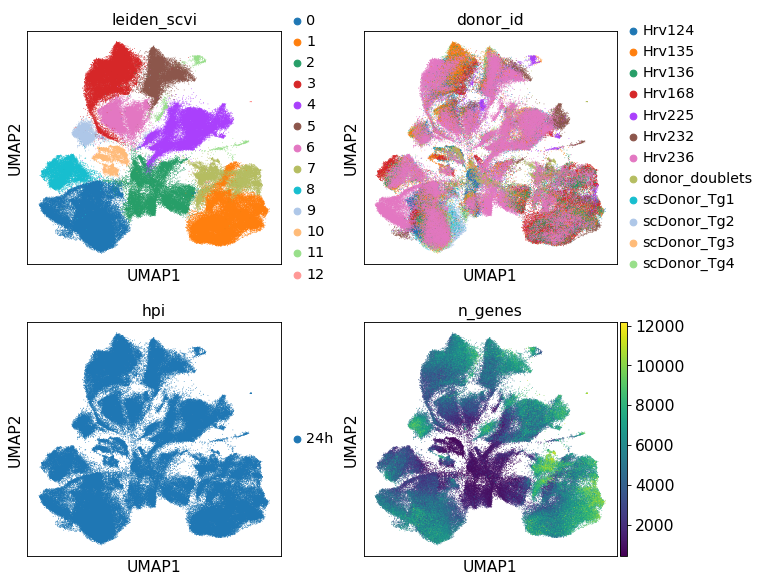

In [20]:
sc.pl.umap(adata, color=["leiden_scvi",'donor_id', 
                         'hpi','n_genes' ], ncols=2, size=2)

In [21]:
sc.set_figure_params(figsize=(6.5,6.5))

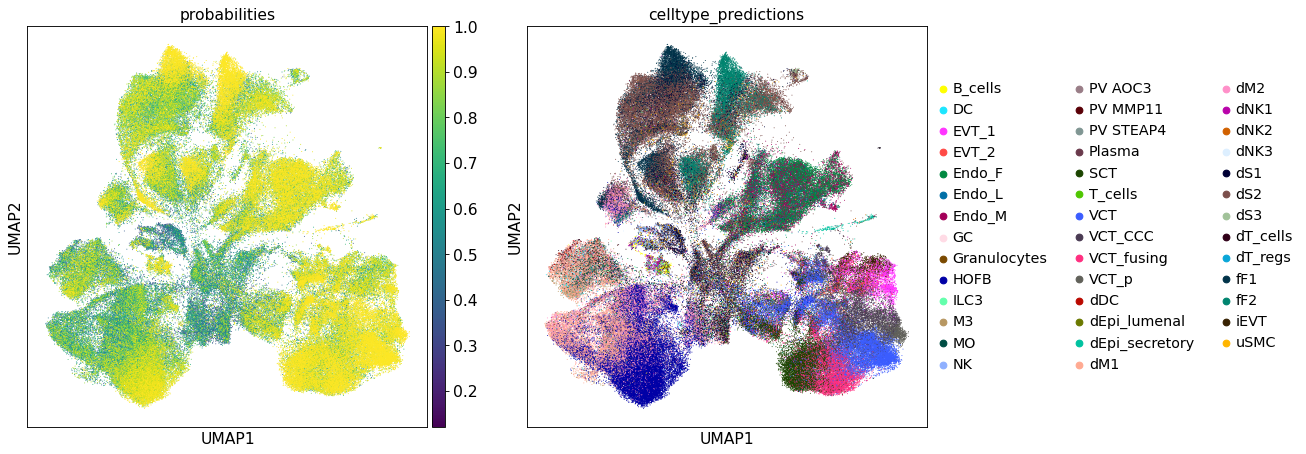

In [22]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=[ 'probabilities','celltype_predictions'], save='_scVI_latent30_labTransfering.pdf', size=3)

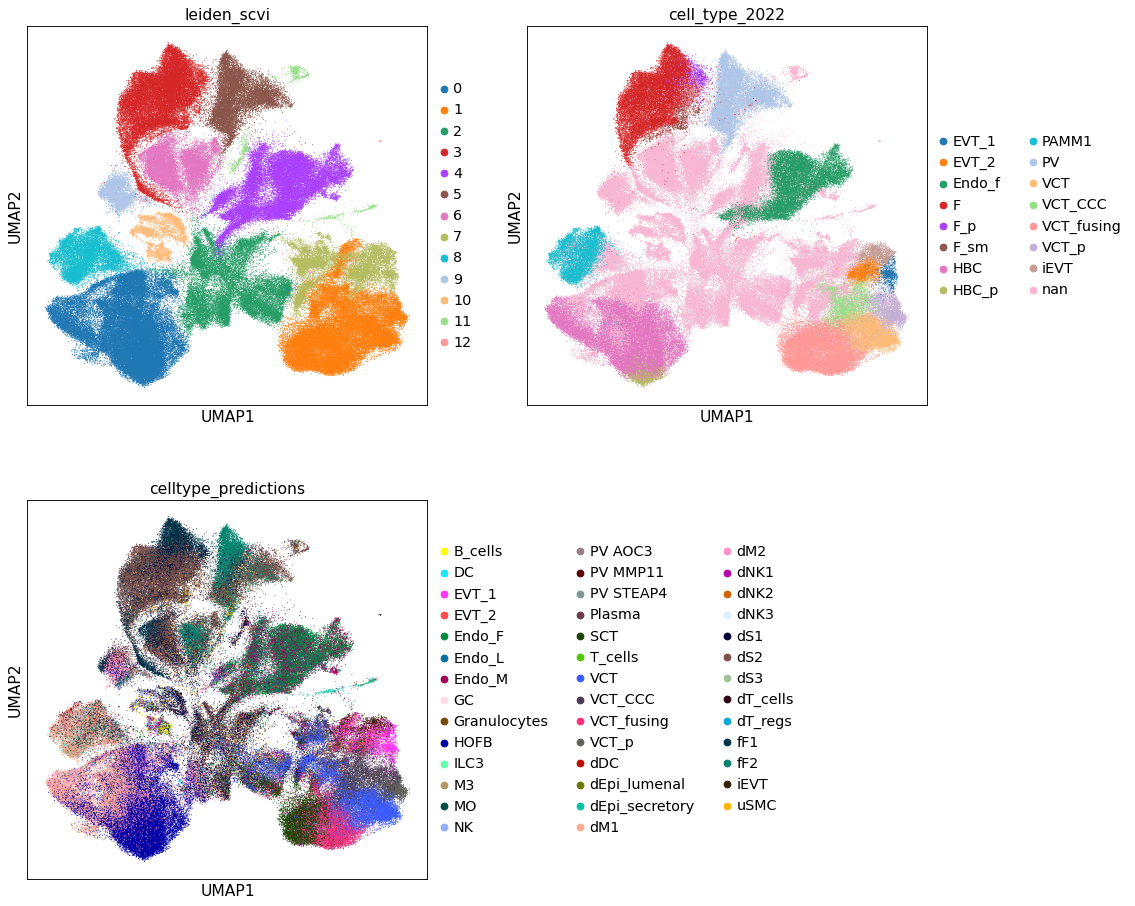

In [23]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=[ 'leiden_scvi','cell_type_2022','celltype_predictions'], save='_scVI_latent30_labTransferingClust.pdf',
           ncols=2, size=3)

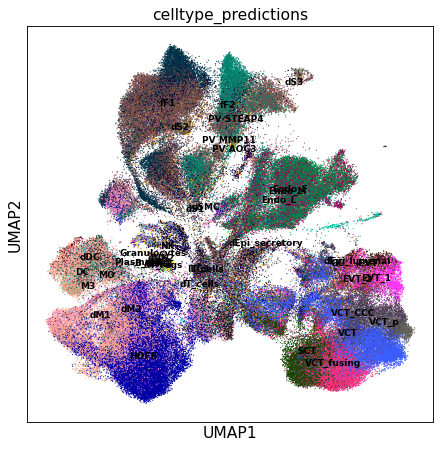

In [24]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['celltype_predictions' ], legend_loc='on data',legend_fontsize='xx-small',
           size=4, save='_scVI_latent30_labTransferOndata.pdf')

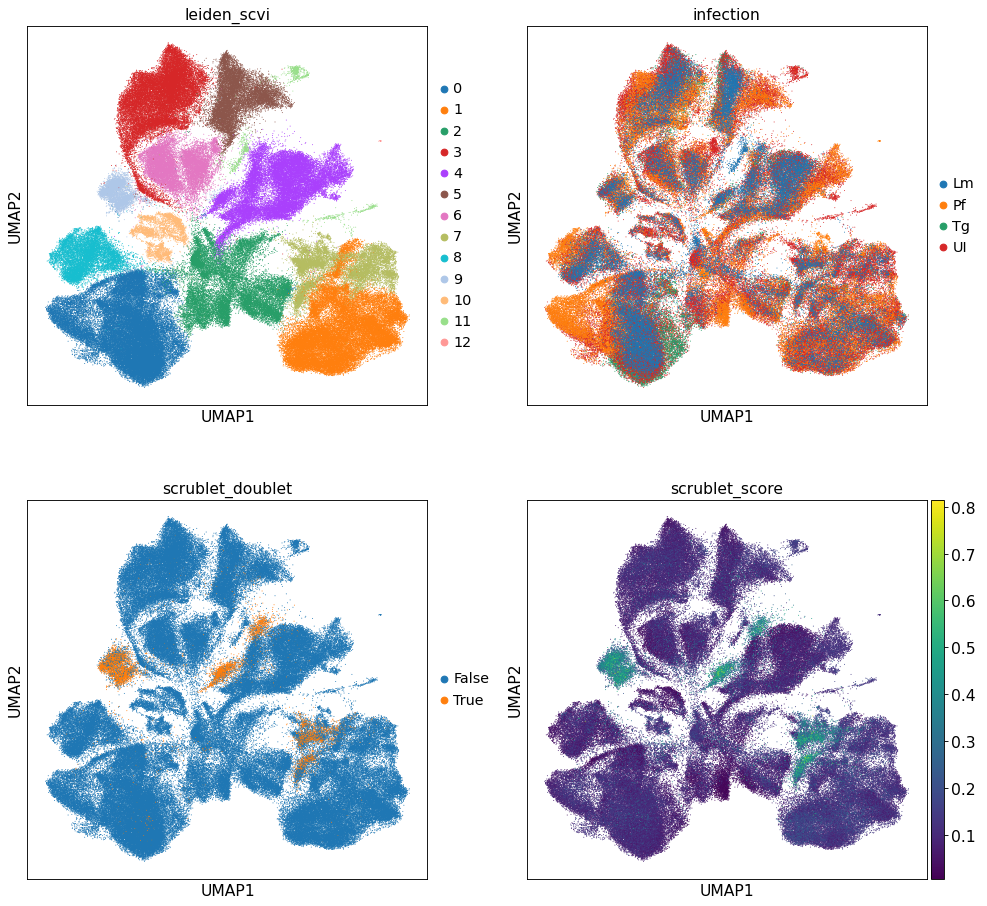

In [25]:
sc.pl.umap(adata, color=["leiden_scvi", "infection" , "scrublet_doublet",'scrublet_score'], ncols=2, size=3)

---

## Broad annotation of cell clusters

## Cluster pre-labeling

The marker genes already reported for different cell types were intensively analysed, together with the clusters' markers, and the label trasfering.

As a result the following identities were assigned:
0: HBC, 1: doublets, 2: Trophoblast, 3: Endo_f, 4: Fibroblast, 5: PV, 6: Fibroblast, 7: doublets, 8: PAMM1, 9: doublets, 10: Erythrocytes, 11: T cells, 12: Epi


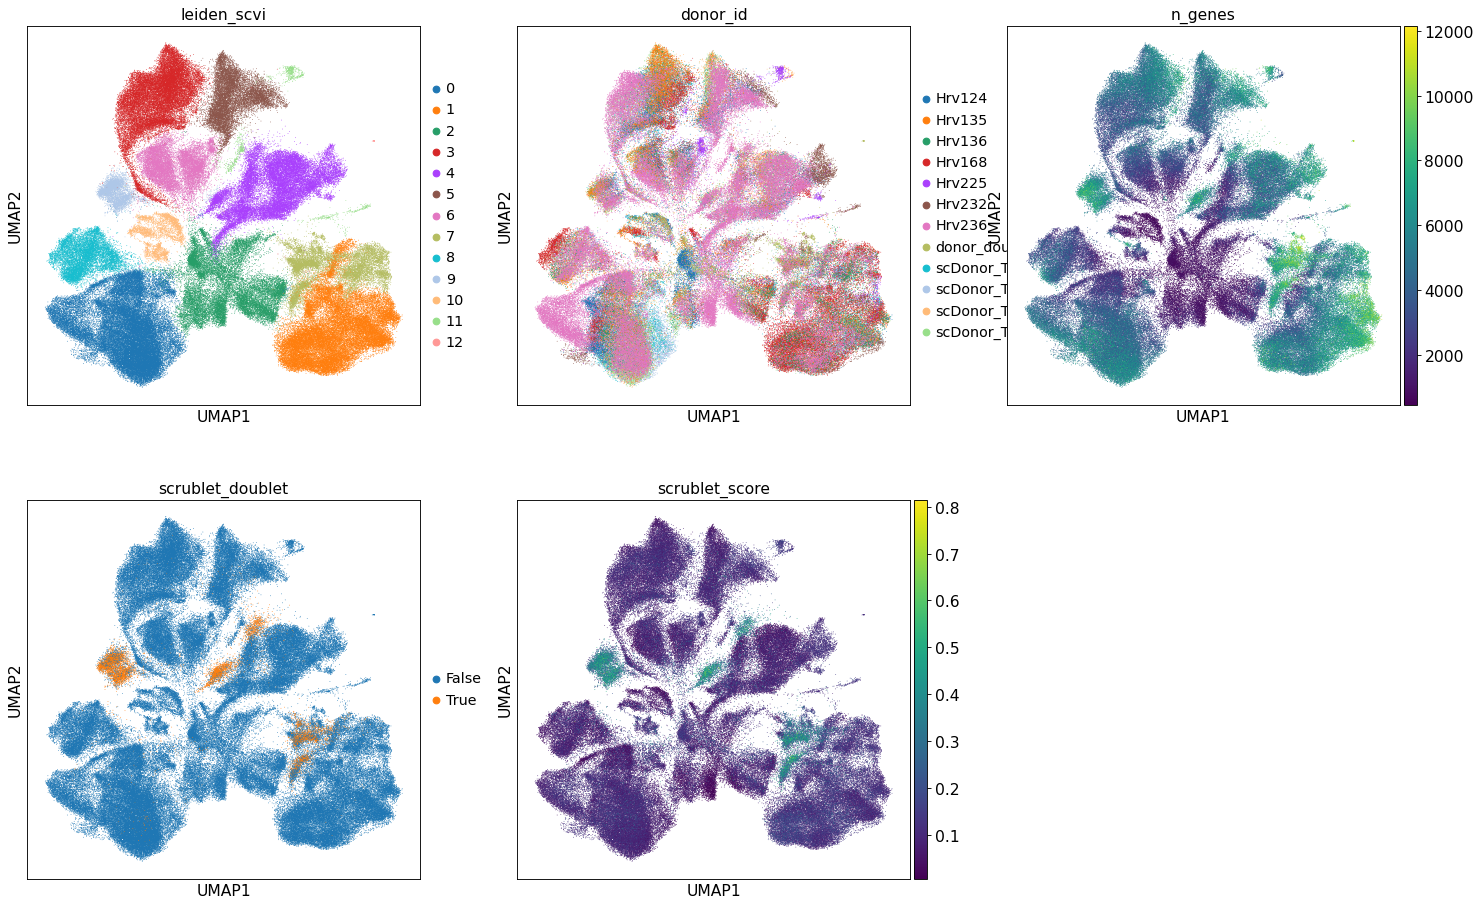

In [26]:
#trophoblats markers
sc.pl.umap(adata, color=[ 'leiden_scvi', 'donor_id','n_genes','scrublet_doublet','scrublet_score',],  ncols=3,
           size=2, save='_scVI_latent30_doubletMarkers.pdf')

In [27]:
#COpying the value of the leiden cluster. The new column will help to change it's values for
# the cluster identity
adata.obs['cell_type']= adata.obs['leiden_scvi']

In [28]:
adata.obs['cell_type']

Pla_HDBR13007974_AAACCCAAGAAGAGCA    10
Pla_HDBR13007974_AAACCCAAGCGTTGTT     3
Pla_HDBR13007974_AAACCCAAGTAGTCAA     1
Pla_HDBR13007974_AAACCCACAATGAACA     0
Pla_HDBR13007974_AAACCCACAGAGAGGG     0
                                     ..
Pla_HDBR13661572_TTTGTTGCATGTCTAG     6
Pla_HDBR13661572_TTTGTTGGTAGGCAAC     6
Pla_HDBR13661572_TTTGTTGGTGCTTATG     4
Pla_HDBR13661572_TTTGTTGGTGGTAACG     8
Pla_HDBR13661572_TTTGTTGGTTGTATGC     6
Name: cell_type, Length: 190897, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

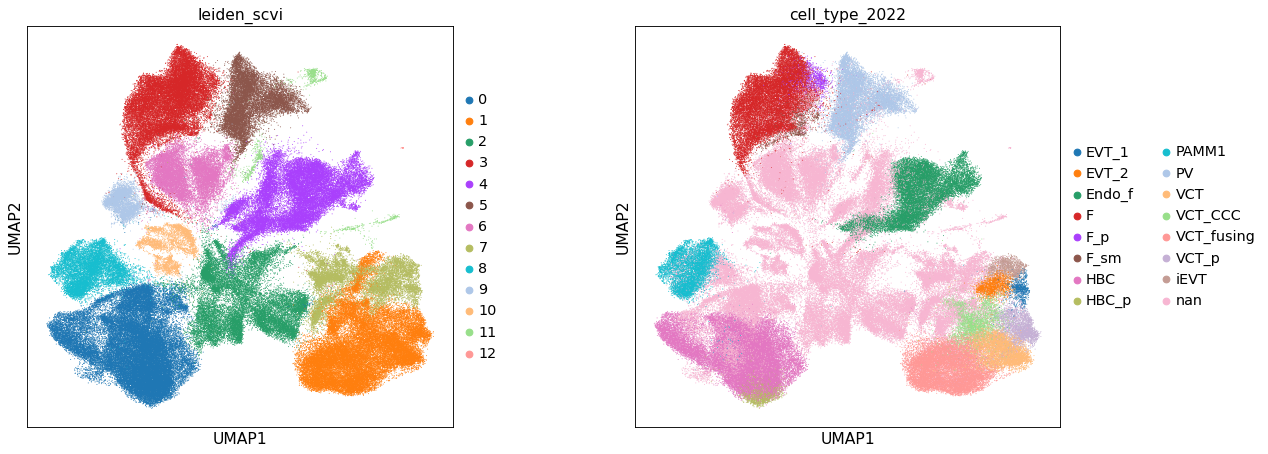

In [29]:
sc.pl.umap(adata, color=["leiden_scvi",'cell_type_2022'], ncols=2, size=3,wspace=0.3)

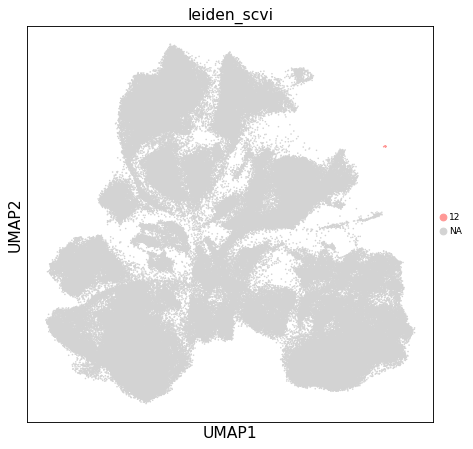

In [31]:
sc.pl.umap(adata, color=['leiden_scvi' ], legend_fontsize='xx-small', size=8, ncols=2, groups=['12'] )

In [32]:
adata.obs['cell_type'] = (adata.obs["leiden_scvi"].map(lambda x: 
                            {"0": "HBC", "1": "Trophoblast", "2": "doublets", "3": "Fibroblast","4": "Endo_f", 
                             "5": "PV", "6": "Fibroblast", "7": "Trophoblast", "8": "PAMM1","9": "doublets",
                              "10": "Erythrocytes & T cells", "11": "lowQC", "12": "lowQC"}
                            .get(x, x)).astype("category"))

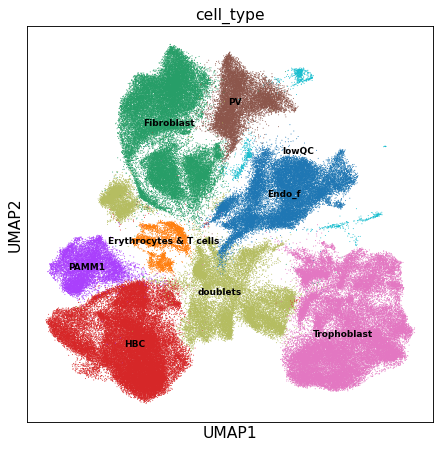

In [33]:
# use scVI imputed values for plottin
sc.pl.umap(adata, color=['cell_type'], legend_loc='on data',legend_fontsize='xx-small', size=3,
           save='_scVI_latent30_indentityDirty.pdf')


## Removal of doublet cluster, and Erythrocytes

In [34]:
adata = adata[adata.obs['cell_type'] != 'doublets']
#adata = adata[adata.obs['scrublet_doublet'] != 'True']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [35]:
adata = adata[adata.obs['cell_type'] != 'Erythrocytes & T cells']
#adata = adata[adata.obs['cell_type'] != 'T cells']
adata = adata[adata.obs['cell_type'] != 'Epi']

In [37]:
#Deleting the doublets: in this case I can easily overlap the doublets identified by SoC
# and the cluster corresponding to them
#adata = adata[adata.obs['donor_id'] != 'donor_doublets']

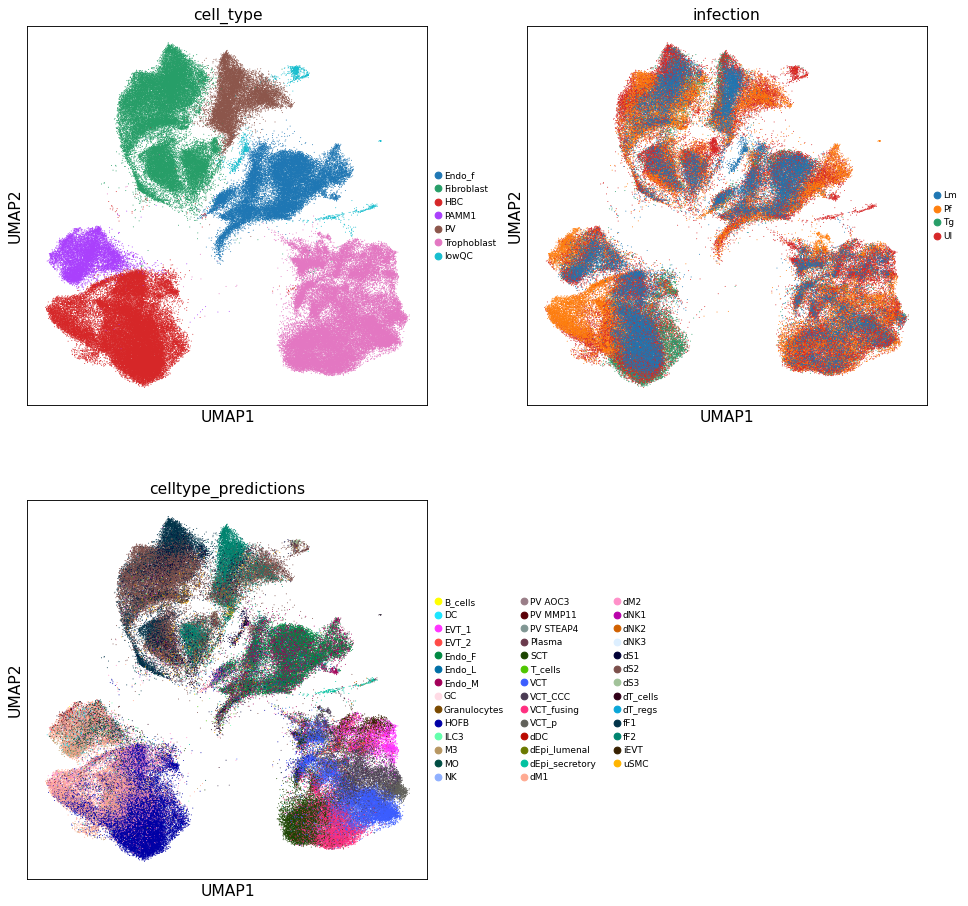

In [36]:
sc.pl.umap(adata, color=['cell_type','infection','celltype_predictions' ], legend_fontsize='xx-small', size=3, ncols=2,
           save= '_scVI_latent30_indentityNoDoublets.pdf')

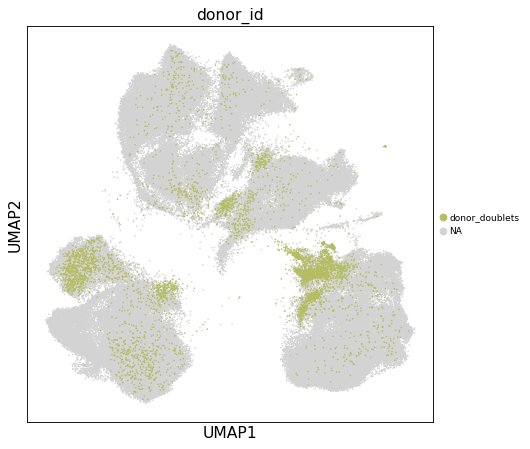

In [37]:
sc.pl.umap(adata, color=['donor_id' ], legend_fontsize='xx-small', size=8, ncols=2, groups=['donor_doublets'] )

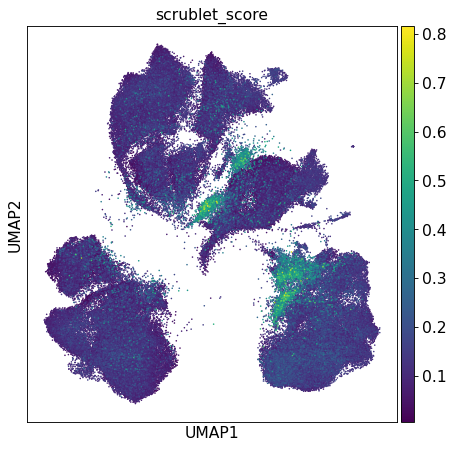

In [38]:
sc.pl.umap(adata, color=['scrublet_score' ], legend_fontsize='xx-small', size=8, ncols=2)


## Re-running Clustering after doublets were deleted

In [39]:
#LATENT 30
sc.pp.neighbors(adata, n_neighbors=30, use_rep="X_scVI_n_latent_30")
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:29)


In [40]:
#clustering. Increasing resolution to separate doublets and delete them.
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

running Leiden clustering
    finished: found 12 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:01:34)


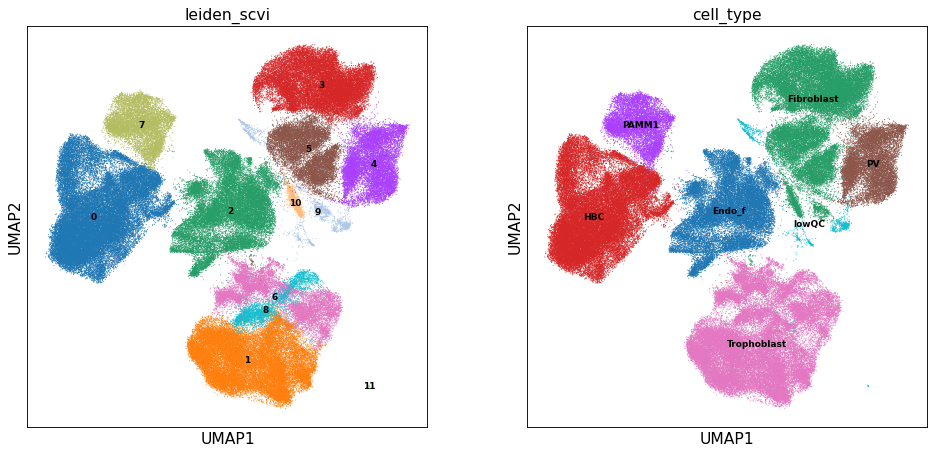

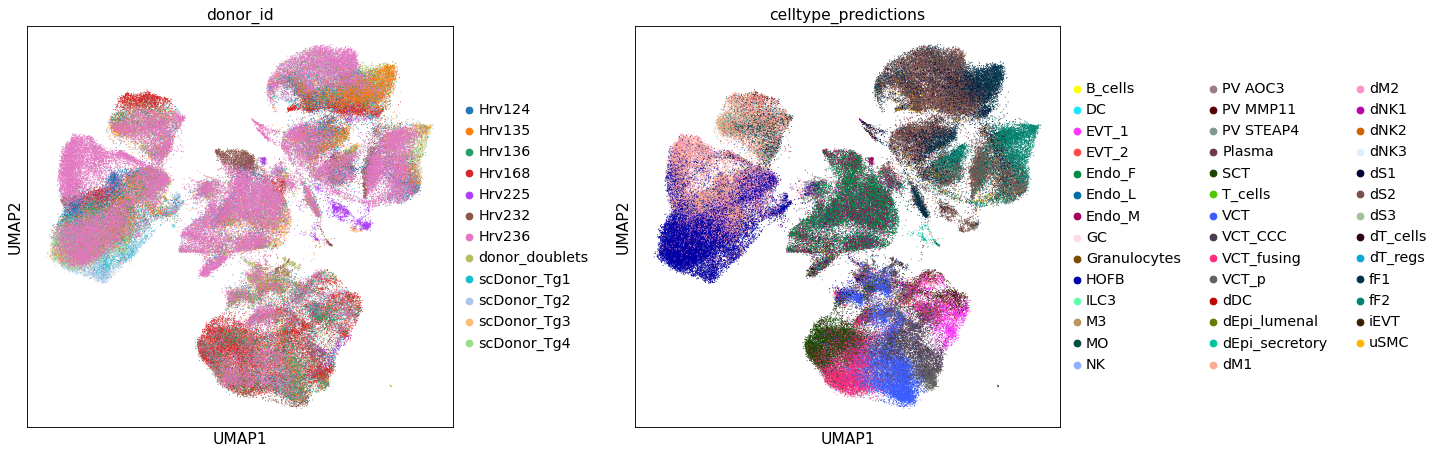

In [41]:
sc.pl.umap(adata, color=["leiden_scvi",'cell_type'], legend_loc='on data',legend_fontsize='xx-small',size=3)

sc.pl.umap(adata, color=['donor_id','celltype_predictions'], wspace=0.3, size=3)

Saving the object semi-clean

In [42]:
adata.write('../results/scVI/rna5_scVIintegrated_latent30_noDoublets_20230707.h5ad')

In [43]:
print('Total number of cells: {:d}'.format(adata.n_obs))

Total number of cells: 164198


In [45]:
#data= sc.read('../results/scVI/S2_scVIintegrated_adata_latent30_noDoublets.h5ad')

In [44]:
set(adata.obs['sample'] )

{'Pla_HDBR11345033',
 'Pla_HDBR11345034',
 'Pla_HDBR12330712',
 'Pla_HDBR12330713',
 'Pla_HDBR12966647',
 'Pla_HDBR12966648',
 'Pla_HDBR13007974',
 'Pla_HDBR13007975',
 'Pla_HDBR13661565',
 'Pla_HDBR13661566',
 'Pla_HDBR13661569',
 'Pla_HDBR13661570',
 'Pla_HDBR13661571',
 'Pla_HDBR13661572',
 'Pla_HDBR13798223',
 'Pla_HDBR13798224'}